# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
subj_range = np.hstack((np.arange(2001,2002),np.arange(3001,3006)))

all_patients = [str(i) for i in subj_range]

In [5]:
print(all_patients)

['2001', '3001', '3002', '3003', '3004', '3005']


In [6]:
train_normal = [str(i) for i in range(1001,1012)]
train_patients = [str(i) for i in range(3001,3005)]

test_normal = ['1012','2002']
test_patients = ['2001','3005']

train_set = np.hstack((train_normal, train_patients))
test_set = np.hstack((test_normal, test_patients))

In [7]:
len(train_set), len(test_set)

(15, 4)

In [8]:
X_all_p, y_all_p, subj_all_p, ts_all_p, hr_all_p = load_all_data(all_patients)

Loading 2001's data
Loading 3001's data
Loading 3002's data
Loading 3003's data
Loading 3004's data
Loading 3005's data
Finished loading


In [9]:
X_all_p

array([[0.24604144, 0.47543612, 0.57618256],
       [0.24643122, 0.47388114, 0.5764286 ],
       [0.24623631, 0.47446426, 0.57372208],
       ...,
       [0.83510285, 0.46095475, 0.67149537],
       [0.72644667, 0.51697021, 0.65305855],
       [0.77446197, 0.52497241, 0.65016134]])

# Data Preprocessing

In [105]:
%run preprocessing.ipynb

# Group Data by Label and Normalize Data

In [60]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [52]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange','darkviolet','gold','pink']

## Show Plot for each Activity and Subject

In [23]:
all_subjects = all_patients

plotting  sit
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)


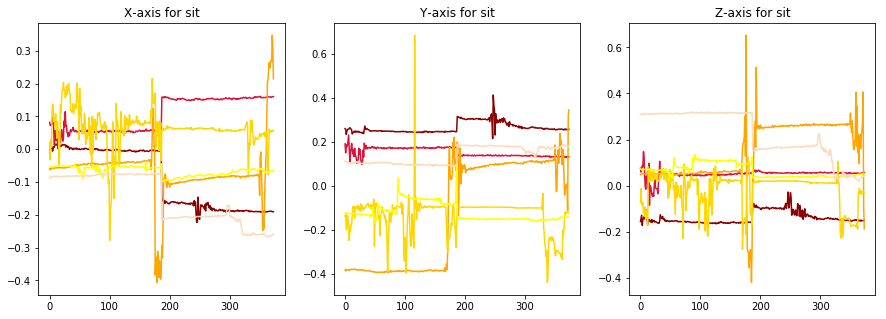

plotting  sleep
(3, 373)
(3, 374)
(3, 374)
(3, 372)
(3, 380)
(3, 380)


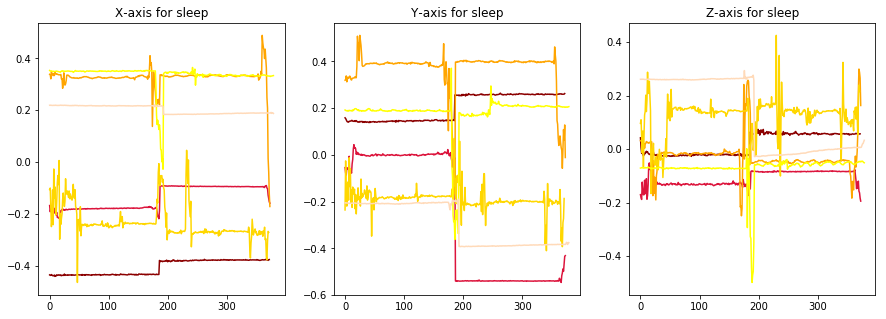

plotting  stand
(3, 560)
(3, 573)
(3, 561)
(3, 558)
(3, 561)
(3, 561)


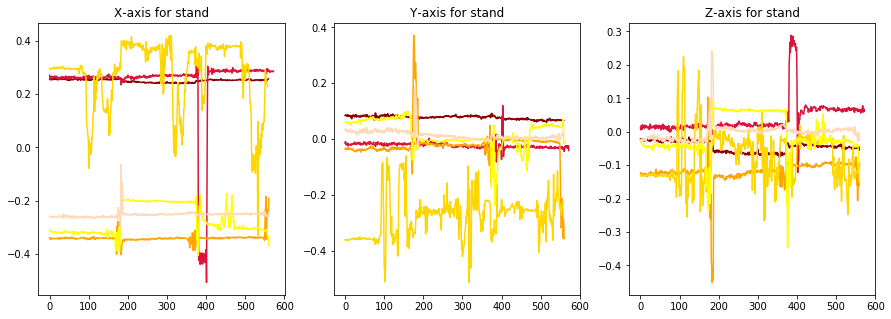

plotting  walk
(3, 1248)
(3, 386)
(3, 374)
(3, 379)
(3, 373)
(3, 367)


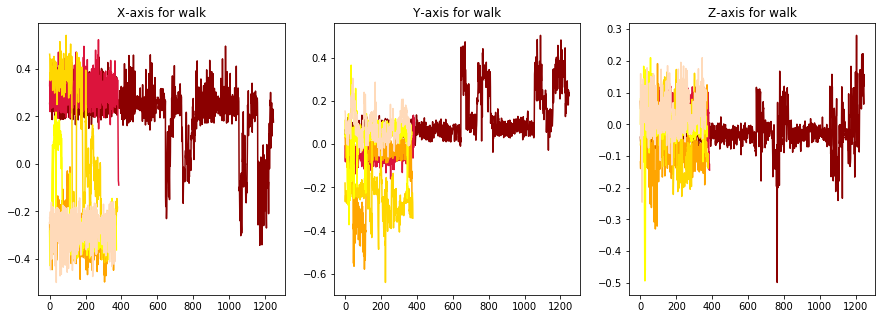

In [113]:
# group X_pca by labels
X_label, y_label = label_grouping(X_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)
plot_all_label(X_label, y_all_p, new_label_list, new_label_dict)

plotting  sit
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)


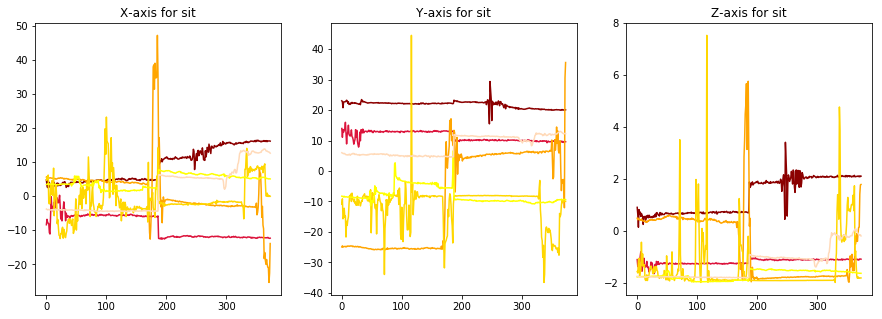

plotting  sleep
(3, 373)
(3, 374)
(3, 374)
(3, 372)
(3, 380)
(3, 380)


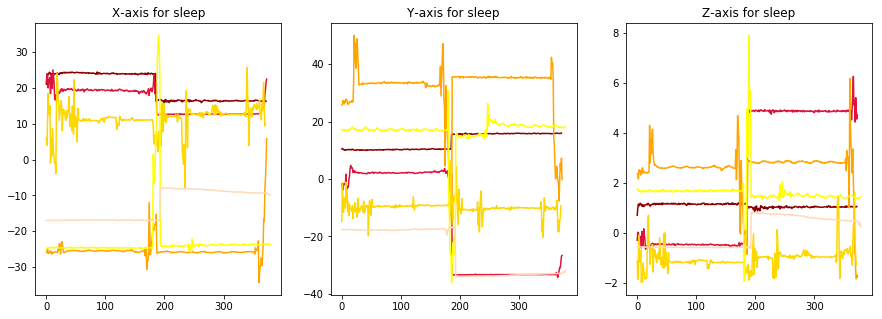

plotting  stand
(3, 560)
(3, 573)
(3, 561)
(3, 558)
(3, 561)
(3, 561)


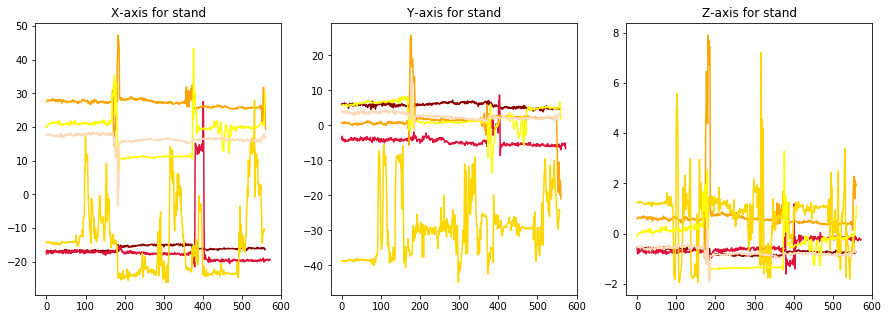

plotting  walk
(3, 1248)
(3, 386)
(3, 374)
(3, 379)
(3, 373)
(3, 367)


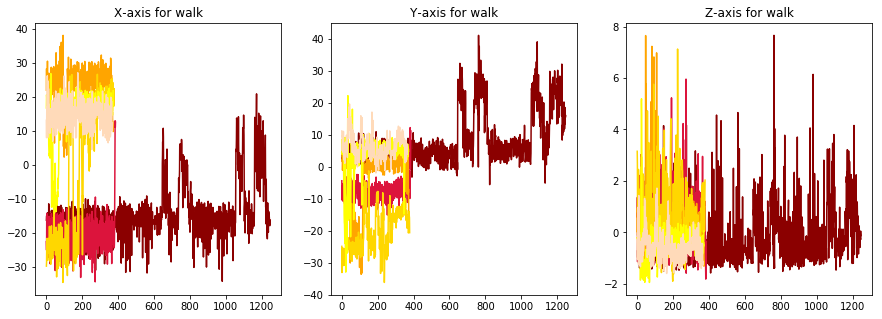

In [116]:
# group X_pca by labels
X_label, y_label = label_grouping(rpy_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)
plot_all_label(X_label, y_all_p, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [25]:
roll, pitch, yaw = calc_rpy(X_all_p, colors)
rpy_p = np.array([roll, pitch, yaw]).transpose()

print(rpy_p.shape, y_all_p.shape)

(10998, 3) (10998,)


# Apply PCA

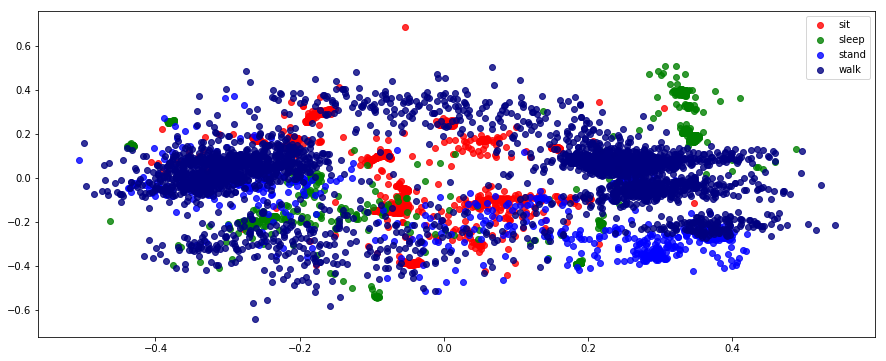

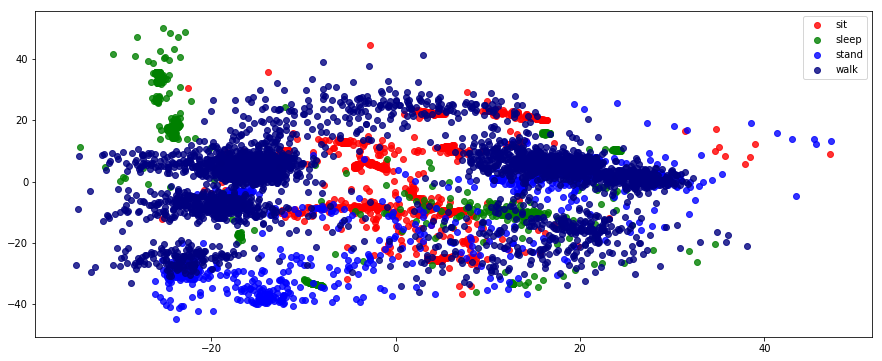

In [115]:
# apply PCA and LDA to X_all and rpy
X_pca_p, pca_p = apply_pca(X_all_p, y_all_p, label_list)
rpy_pca_p, pca_rpy_p = apply_pca(rpy_p, y_all_p, label_list)

# Reshape Data (Pure Label)

In [45]:
# print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

In [118]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(X_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

In [85]:
print(X_pure.shape, y_pure.shape)

(9582, 180) (9582,)


In [145]:
X_pure_2, y_pure_2 = prepare_pure_label_2(X_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)

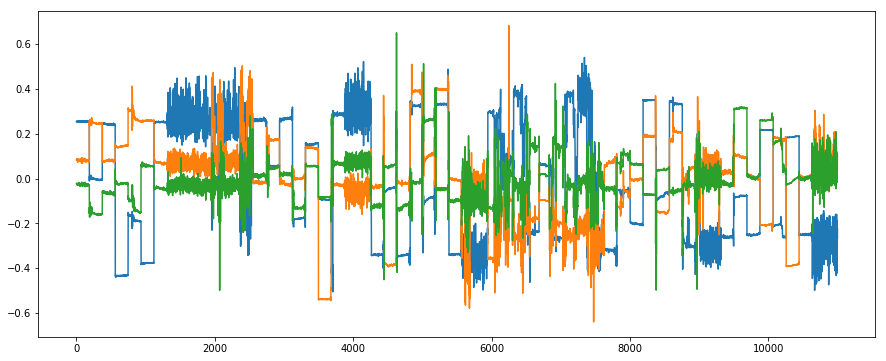

In [154]:
f, ax = plt.subplots(figsize=(15,6))
ax.plot(X_pca_p)
plt.show()

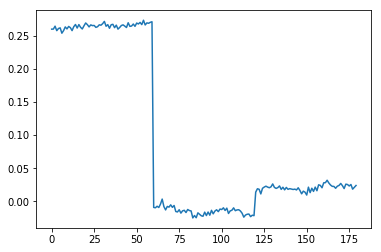

In [156]:
plt.plot(X_pure[4500])
plt.show()

# Reshape Data (Impure Label)

In [86]:
X_impure, y_impure = prepare_impure_label(X_all_p, y_all_p)

In [87]:
print(X_impure.shape, y_impure.shape)

(10939, 180) (10939,)


# Split Train and Test Set

In [120]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(8751, 180)
(2188, 180)


In [121]:
print(X_train.shape)
print(X_test.shape)

(7665, 180)
(1917, 180)


In [52]:
X_tr

array([[0.65, 0.65, 0.65, ..., 0.65, 0.65, 0.65],
       [0.39, 0.35, 0.53, ..., 0.3 , 0.3 , 0.32],
       [0.44, 0.44, 0.44, ..., 0.7 , 0.7 , 0.69],
       ...,
       [0.84, 0.84, 0.84, ..., 0.48, 0.48, 0.48],
       [0.66, 0.65, 0.66, ..., 0.64, 0.64, 0.64],
       [0.11, 0.19, 0.18, ..., 0.35, 0.36, 0.38]])

# K-Nearest Neighbors

In [129]:
%run eval_score.ipynb

In [55]:
# acc_list = []

# for i in range(1,20):
#     print('k = ',i)
#     nn_model = nn_classifier(X_train, y_train, k=i)
#     print("Finished training")

#     y_pred = nn_model.predict(X_test)

#     acc = accuracy_score(y_test, y_pred)
#     acc_list.append(acc)
#     print(acc)

#     show_conf_matrix(y_test, y_pred, LABELS)
#     show_clf_report(y_test, y_pred, LABELS)

In [128]:
# plt.plot(acc_list)
# plt.show()

In [122]:
nn_model = nn_classifier(X_train, y_train, k=3)
print("Finished training")

Finished training


In [123]:
filename = basepath + 'model/knn_model_patients.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [124]:
y_pred = nn_model.predict(X_test)

## Evaluation

In [125]:
%run eval_score.ipynb

0.9280125195618153


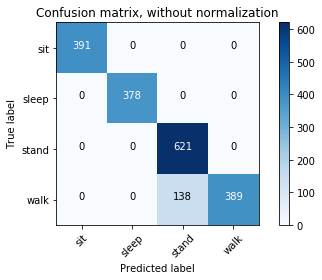

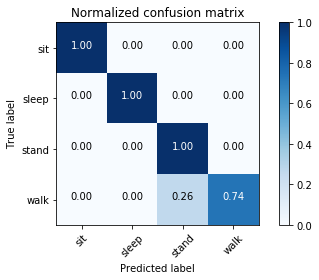

              precision    recall  f1-score   support

         sit       1.00      1.00      1.00       391
       sleep       1.00      1.00      1.00       378
       stand       0.82      1.00      0.90       621
        walk       1.00      0.74      0.85       527

   micro avg       0.93      0.93      0.93      1917
   macro avg       0.95      0.93      0.94      1917
weighted avg       0.94      0.93      0.93      1917



In [130]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

# Walk Algorithm

In [131]:
%run classifier_alg.ipynb

In [132]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca_p],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca_p],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

In [133]:
# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']

df_pca = df_rpy[cols]     # patients

In [134]:
xyz_pca = np.array(df_pca.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [135]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [136]:
xyz_pca.shape, df_pca.shape

((10939, 60, 3), (10998, 3))

In [137]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [60]:
walk_pred

array([0, 0, 0, ..., 3, 3, 3])

In [61]:
walk_pred = np.array(walk_pred)

walk_pred.shape

(10939,)

In [62]:
walk_actual = np.array([3 if (df_rpy.loc[i, 'label']==3) else 0 for i in range(len(df_rpy))])

walk_actual.shape

(10998,)

In [63]:
print(walk_actual)

[0 0 0 ... 3 3 3]


## Walk Algorithm Evaluation

In [64]:
walk_lbl = ['NaN','walk']

0.8959685528841759


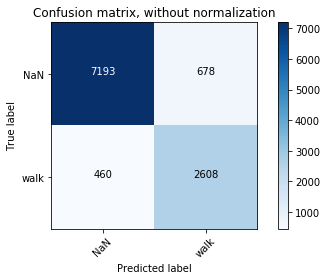

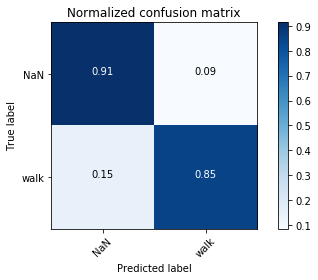

              precision    recall  f1-score   support

         NaN       0.94      0.91      0.93      7871
        walk       0.79      0.85      0.82      3068

   micro avg       0.90      0.90      0.90     10939
   macro avg       0.87      0.88      0.87     10939
weighted avg       0.90      0.90      0.90     10939



In [65]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [66]:
X_test_new = get_inverse_X(X_test)

X_test_new

array([[[0.79, 0.4 , 0.58],
        [0.76, 0.39, 0.61],
        [0.74, 0.41, 0.6 ],
        ...,
        [0.86, 0.39, 0.63],
        [0.76, 0.43, 0.61],
        [0.75, 0.42, 0.62]],

       [[0.15, 0.39, 0.65],
        [0.15, 0.39, 0.65],
        [0.15, 0.39, 0.65],
        ...,
        [0.16, 0.39, 0.65],
        [0.15, 0.39, 0.65],
        [0.15, 0.39, 0.65]],

       [[0.26, 0.46, 0.59],
        [0.3 , 0.49, 0.6 ],
        [0.14, 0.47, 0.57],
        ...,
        [0.19, 0.49, 0.54],
        [0.34, 0.48, 0.57],
        [0.29, 0.48, 0.57]],

       ...,

       [[0.68, 0.39, 0.46],
        [0.68, 0.39, 0.46],
        [0.68, 0.39, 0.46],
        ...,
        [0.68, 0.39, 0.46],
        [0.68, 0.39, 0.46],
        [0.68, 0.39, 0.46]],

       [[0.2 , 0.47, 0.54],
        [0.26, 0.47, 0.56],
        [0.25, 0.49, 0.57],
        ...,
        [0.22, 0.47, 0.59],
        [0.23, 0.49, 0.57],
        [0.24, 0.5 , 0.55]],

       [[0.76, 0.47, 0.55],
        [0.76, 0.47, 0.55],
        [0.76, 0

In [67]:
walk_pred = classify_walk_2(X_test_new)

In [68]:
y_pred_new = combine_2(X_test_new, y_pred)

0.9415753781950965


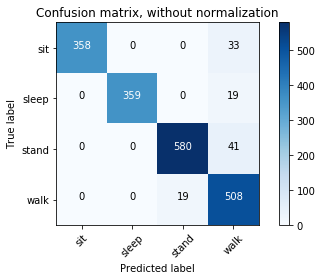

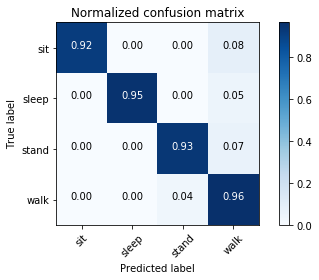

              precision    recall  f1-score   support

         sit       1.00      0.92      0.96       391
       sleep       1.00      0.95      0.97       378
       stand       0.97      0.93      0.95       621
        walk       0.85      0.96      0.90       527

   micro avg       0.94      0.94      0.94      1917
   macro avg       0.95      0.94      0.95      1917
weighted avg       0.95      0.94      0.94      1917



In [69]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [76]:
%run test_model.ipynb

In [74]:
filename = basepath + 'model/knn_model_patients.pkl'

model = pickle.load(open(filename,'rb'))

Loading 3001's data
Finished prediction


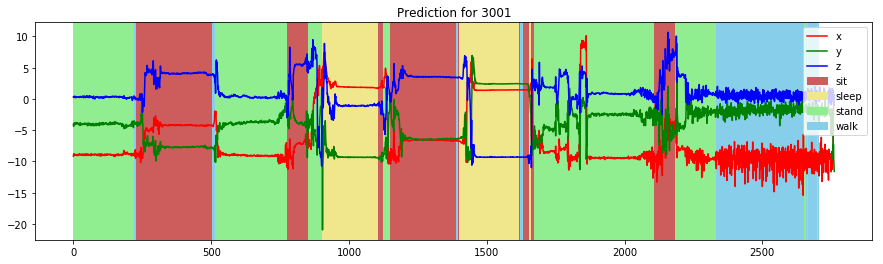

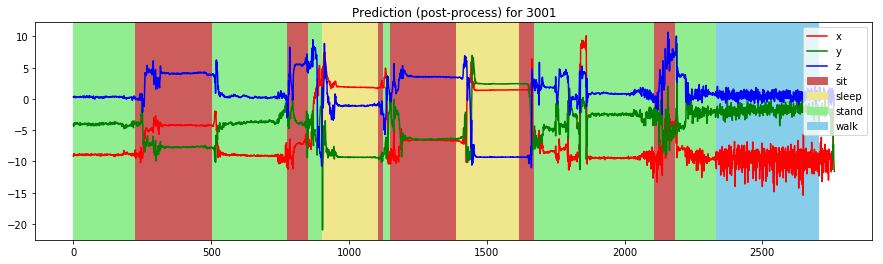

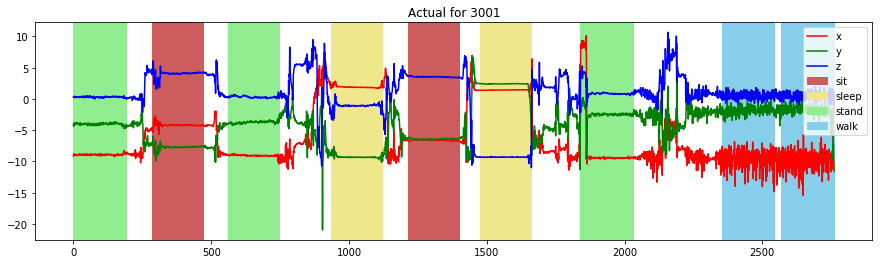

0.9505494505494505


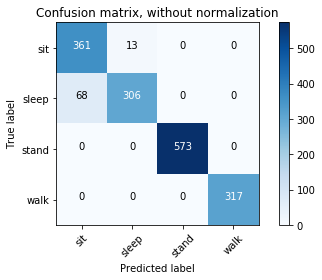

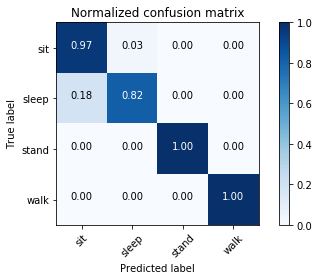

              precision    recall  f1-score   support

         sit       0.84      0.97      0.90       374
       sleep       0.96      0.82      0.88       374
       stand       1.00      1.00      1.00       573
        walk       1.00      1.00      1.00       317

   micro avg       0.95      0.95      0.95      1638
   macro avg       0.95      0.95      0.95      1638
weighted avg       0.95      0.95      0.95      1638

Loading 3002's data
Finished prediction


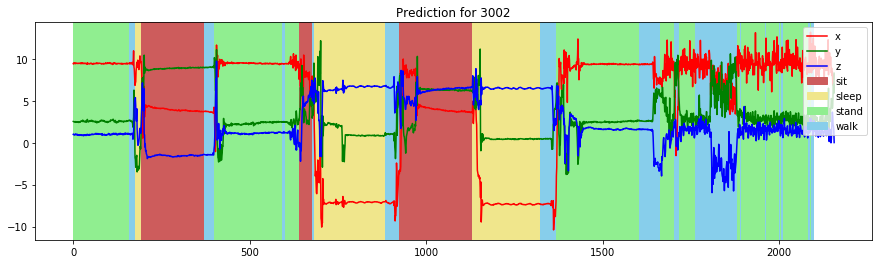

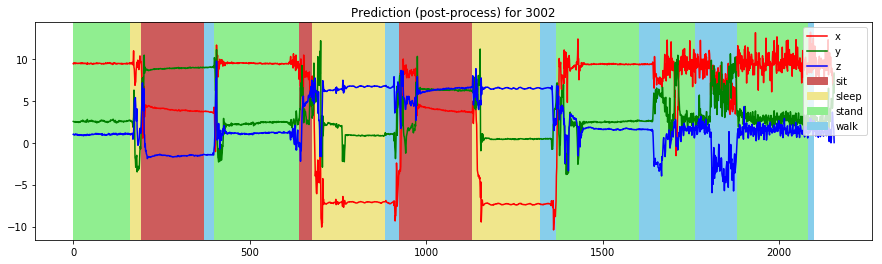

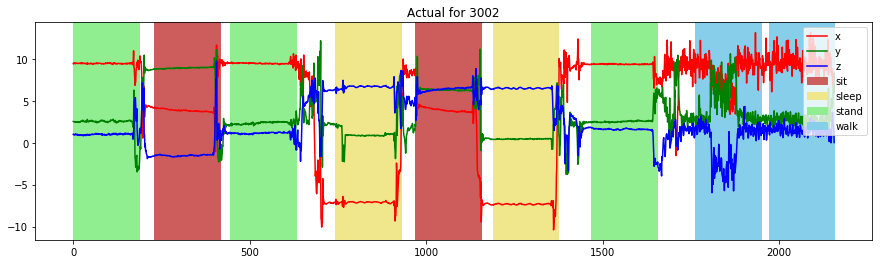

0.7290242386575513


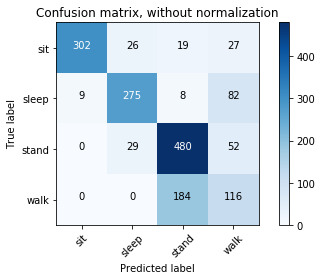

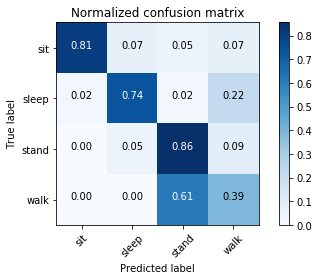

              precision    recall  f1-score   support

         sit       0.97      0.81      0.88       374
       sleep       0.83      0.74      0.78       374
       stand       0.69      0.86      0.77       561
        walk       0.42      0.39      0.40       300

   micro avg       0.73      0.73      0.73      1609
   macro avg       0.73      0.70      0.71      1609
weighted avg       0.74      0.73      0.73      1609

Loading 3003's data
Finished prediction


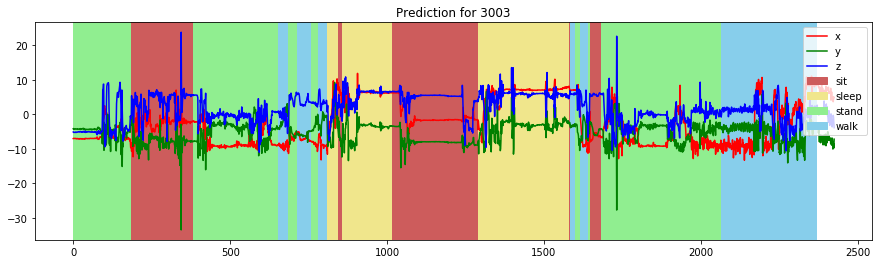

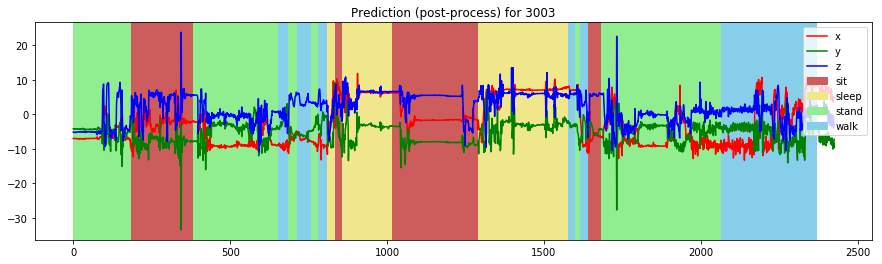

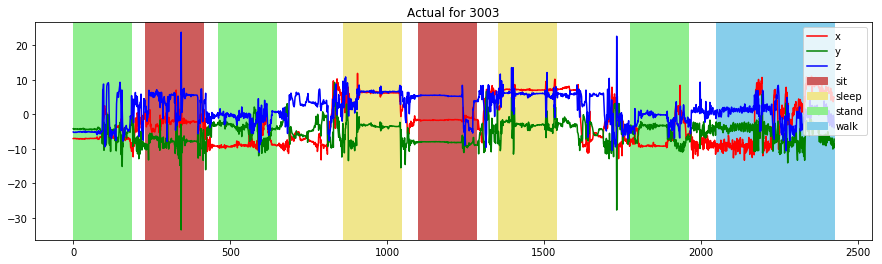

0.9476600985221675


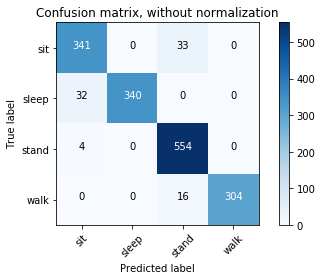

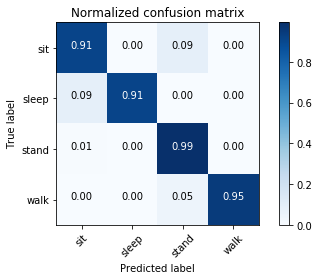

              precision    recall  f1-score   support

         sit       0.90      0.91      0.91       374
       sleep       1.00      0.91      0.96       372
       stand       0.92      0.99      0.95       558
        walk       1.00      0.95      0.97       320

   micro avg       0.95      0.95      0.95      1624
   macro avg       0.96      0.94      0.95      1624
weighted avg       0.95      0.95      0.95      1624

Loading 3004's data
Finished prediction


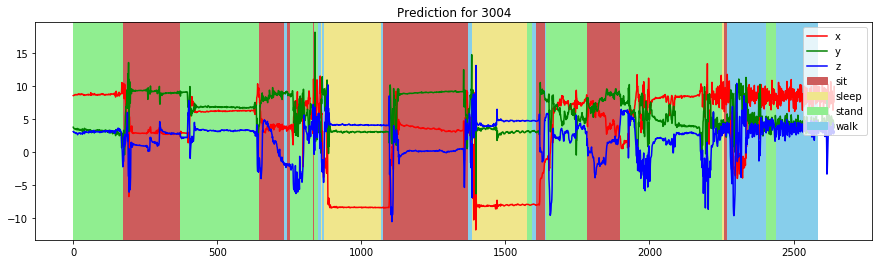

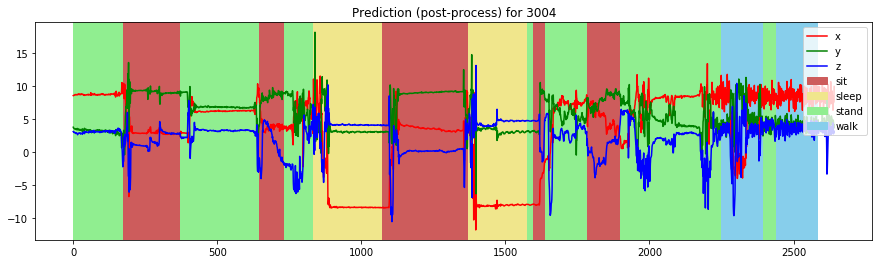

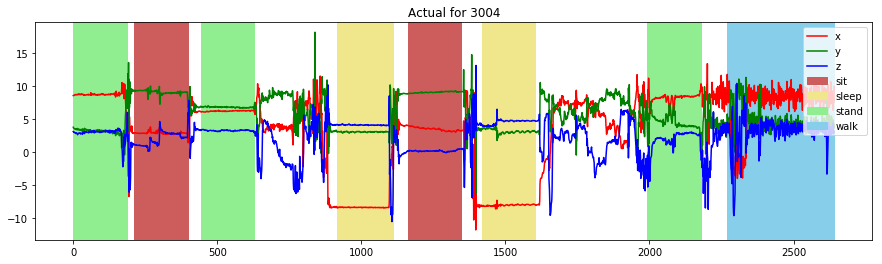

0.9005524861878453


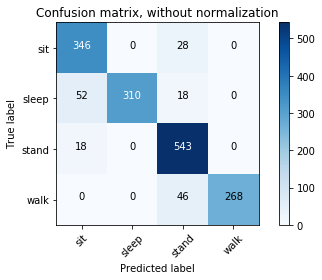

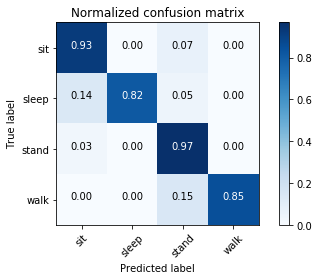

              precision    recall  f1-score   support

         sit       0.83      0.93      0.88       374
       sleep       1.00      0.82      0.90       380
       stand       0.86      0.97      0.91       561
        walk       1.00      0.85      0.92       314

   micro avg       0.90      0.90      0.90      1629
   macro avg       0.92      0.89      0.90      1629
weighted avg       0.91      0.90      0.90      1629

Loading 3005's data
Finished prediction


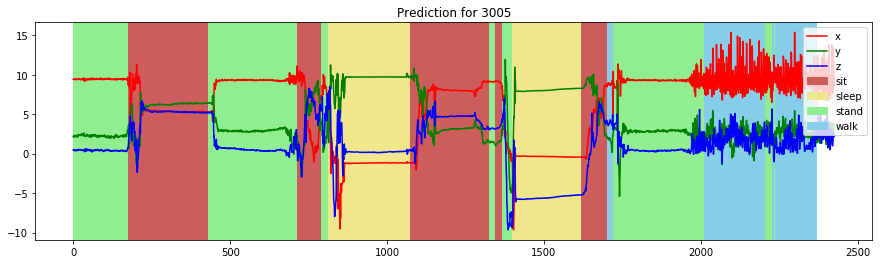

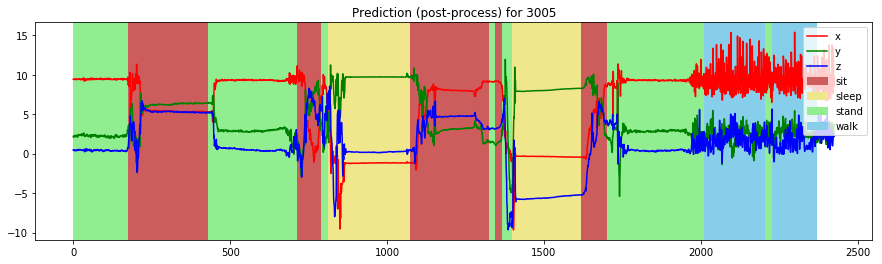

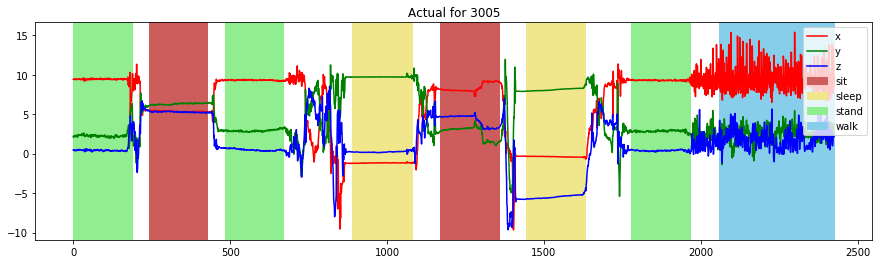

0.9513247073321011


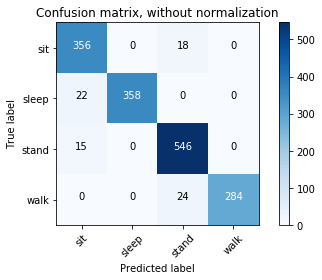

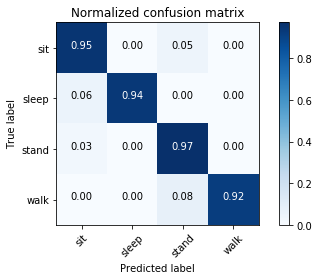

              precision    recall  f1-score   support

         sit       0.91      0.95      0.93       374
       sleep       1.00      0.94      0.97       380
       stand       0.93      0.97      0.95       561
        walk       1.00      0.92      0.96       308

   micro avg       0.95      0.95      0.95      1623
   macro avg       0.96      0.95      0.95      1623
weighted avg       0.95      0.95      0.95      1623



In [77]:
all_subjects = [str(i) for i in range(3001,3006)]

df_y_all = call_functions(all_subjects, pca_p)

Loading 3004's data
Finished prediction


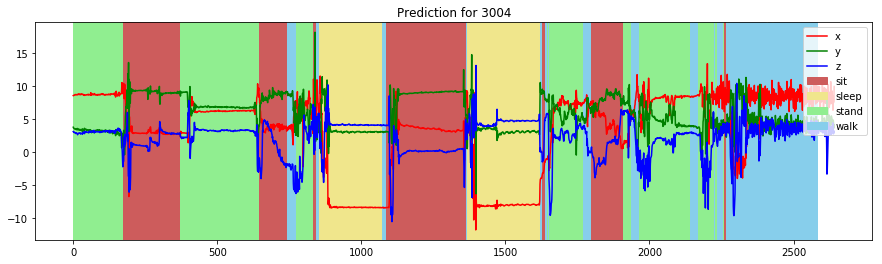

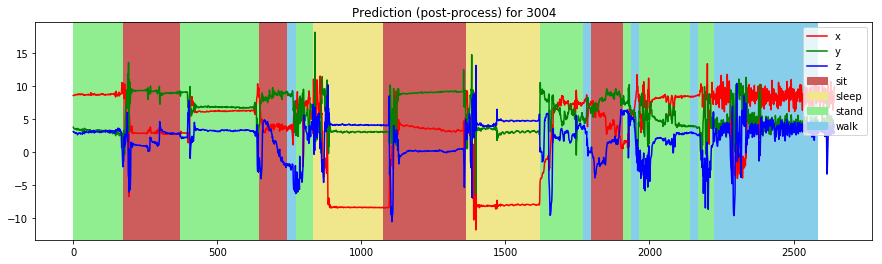

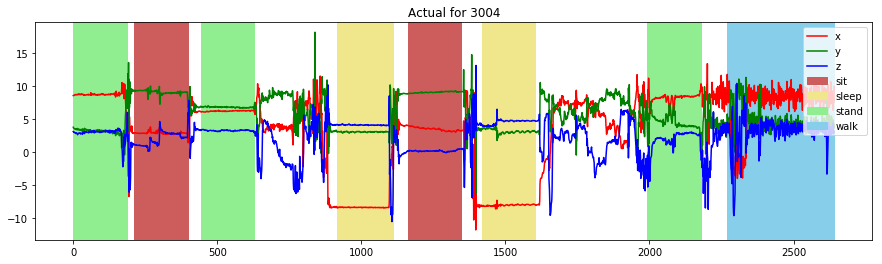

0.9349294045426643


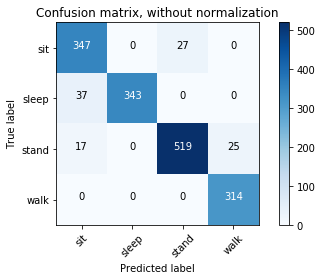

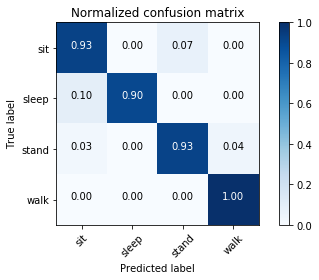

              precision    recall  f1-score   support

         sit       0.87      0.93      0.90       374
       sleep       1.00      0.90      0.95       380
       stand       0.95      0.93      0.94       561
        walk       0.93      1.00      0.96       314

   micro avg       0.93      0.93      0.93      1629
   macro avg       0.94      0.94      0.94      1629
weighted avg       0.94      0.93      0.94      1629



In [74]:
s = '3004'
print("Loading {0}'s data".format(s))

df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [75]:
cols = ['x','y','z']
df_y_all

,timestamp,y_pred,y_actual
0,2019-03-05 10:03:34.189,2,2
1,2019-03-05 10:03:34.347,2,2
2,2019-03-05 10:03:34.509,2,2
3,2019-03-05 10:03:34.67,2,2
4,2019-03-05 10:03:34.828,2,2
5,2019-03-05 10:03:34.99,2,2
6,2019-03-05 10:03:35.15,2,2
7,2019-03-05 10:03:35.312,2,2
8,2019-03-05 10:03:35.471,2,2
9,2019-03-05 10:03:35.633,2,2


(8002, 3)
0.9212696825793552


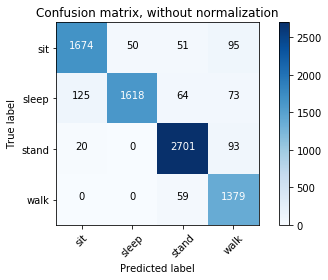

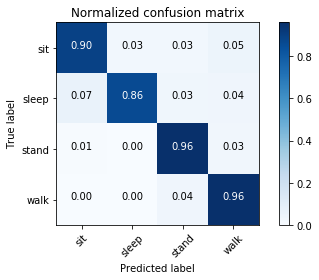

              precision    recall  f1-score   support

         sit       0.92      0.90      0.91      1870
       sleep       0.97      0.86      0.91      1880
       stand       0.94      0.96      0.95      2814
        walk       0.84      0.96      0.90      1438

   micro avg       0.92      0.92      0.92      8002
   macro avg       0.92      0.92      0.92      8002
weighted avg       0.92      0.92      0.92      8002

{'precision': 0.9176604428948468, 'recall': 0.9186599738408978, 'f1-score': 0.9163035783004227, 'support': 8002}


In [76]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y_all[df_y_all['y_pred']!=-1]
df_y_notnull = df_y_notnull.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

print(df_y_notnull.shape)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
show_clf_report(actual_y, pred_y, LABELS)

label_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, label_list, output_dict=True)
print(report['macro avg'])

# Display Table

In [77]:
from prettytable import PrettyTable

In [78]:
# print(s)
df_y = df_y_all.copy()

df_y[:200]

,timestamp,y_pred,y_actual
0,2019-03-05 10:03:34.189,2,2
1,2019-03-05 10:03:34.347,2,2
2,2019-03-05 10:03:34.509,2,2
3,2019-03-05 10:03:34.67,2,2
4,2019-03-05 10:03:34.828,2,2
5,2019-03-05 10:03:34.99,2,2
6,2019-03-05 10:03:35.15,2,2
7,2019-03-05 10:03:35.312,2,2
8,2019-03-05 10:03:35.471,2,2
9,2019-03-05 10:03:35.633,2,2


In [79]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
        
    keep_lb = df_y.loc[keep]['y_pred']

    if(keep_lb!=df_y.loc[i]['y_pred']):
        label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                             df_y.loc[i-1]['y_pred']])

        period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

        keep = i

In [80]:
actual_label_period = []
actual_period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y_notnull)):
#     if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=
#        calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
#        calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=
#        calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
    keep_lb = df_y_notnull.loc[keep]['y_actual']

    if(keep_lb!=df_y_notnull.loc[i]['y_actual']):
        actual_label_period.append([df_y_notnull.loc[keep]['timestamp'], df_y_notnull.loc[i-1]['timestamp'], 
                             df_y_notnull.loc[i-1]['y_actual']])

        actual_period_list[df_y_notnull.loc[i-1]['y_actual']].append([df_y_notnull.loc[keep]['timestamp'],
                                                                    df_y_notnull.loc[i-1]['timestamp']])

        keep = i

In [81]:
label_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], label_list[row[2]]])

In [82]:
print(t)

+-------------------------+-------------------------+-------+
|          start          |           end           |  pred |
+-------------------------+-------------------------+-------+
| 2019-03-05 10:03:34.189 |  2019-03-05 10:04:07.1  | stand |
| 2019-03-05 10:04:07.262 | 2019-03-05 10:04:13.683 |  walk |
| 2019-03-05 10:04:13.842 | 2019-03-05 10:04:53.658 |  sit  |
| 2019-03-05 10:04:53.817 | 2019-03-05 10:04:57.188 |  walk |
|  2019-03-05 10:04:57.35 | 2019-03-05 10:05:37.166 | stand |
| 2019-03-05 10:05:37.326 | 2019-03-05 10:05:53.554 |  sit  |
| 2019-03-05 10:05:53.704 |  2019-03-05 10:06:30.15 | sleep |
| 2019-03-05 10:06:30.311 | 2019-03-05 10:06:33.523 | stand |
| 2019-03-05 10:06:33.683 | 2019-03-05 10:06:39.464 |  walk |
| 2019-03-05 10:06:39.622 | 2019-03-05 10:07:17.198 |  sit  |
| 2019-03-05 10:07:17.358 | 2019-03-05 10:07:55.093 | sleep |
| 2019-03-05 10:07:55.253 | 2019-03-05 10:08:00.391 | stand |
| 2019-03-05 10:08:00.552 | 2019-03-05 10:08:04.406 |  sit  |
| 2019-0

In [83]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(label_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(label_list)):
    activity_changes.append([label_list[i], label_cnt_list[i]])
    
print(activity_changes)

85
[['sit', 20], ['sleep', 10], ['stand', 29], ['walk', 26]]


In [84]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [85]:
print(tabl_act_chng)

+---------------+------------------+
|     Label     | Activities Count |
+---------------+------------------+
|      sit      |        20        |
|     sleep     |        10        |
|     stand     |        29        |
|      walk     |        26        |
|               |                  |
| total changes |        85        |
+---------------+------------------+


## Active Inactive Count (ALL)

In [86]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [87]:
print(tabl_act)

+----------+------------------+
|  Label   | Activities Count |
+----------+------------------+
| Inactive |        30        |
|  Active  |        55        |
+----------+------------------+


# Convert Time to String Method

In [88]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [89]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([label_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [90]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in label_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(label_list)):
    lb = label_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in label_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in label_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

In [91]:
actual_label_cnt_list = [0 for i in range(len(label_list))]
for lb_p in actual_label_period:
    label_i = lb_p[2]
    
    actual_label_cnt_list[label_i] += 1

In [92]:
total_secs = []
for i in range(len(actual_period_list)):    
    secs = 0
    for p_i in actual_period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tabl = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tabl.add_row([label_list[i], convert_time_to_string(total_secs[i]), 
                  percent_secs[i], actual_label_cnt_list[i]])

tabl.add_row(['', '', '',''])
tabl.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(actual_label_period)])

# Activity Durations Table

In [93]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

Prediction
+-------+---------+------------+----------------+
| Label | Minutes | Percentage | Activity Count |
+-------+---------+------------+----------------+
|  sit  |   8:00  |   25.543   |       20       |
| sleep |   6:27  |   20.646   |       10       |
| stand |  11:39  |   37.228   |       29       |
|  walk |   5:11  |   16.582   |       26       |
|       |         |            |                |
| total |  31:19  |   99.999   |       85       |
+-------+---------+------------+----------------+
Actual
+-------+---------+------------+----------------+
| Label | Minutes | Percentage | Activity Count |
+-------+---------+------------+----------------+
|  sit  |   4:58  |   24.221   |       10       |
| sleep |   5:00  |   24.353   |       10       |
| stand |   7:29  |   36.45    |       15       |
|  walk |   3:04  |   14.977   |       4        |
|       |         |            |                |
| total |  20:33  |  100.001   |       39       |
+-------+---------+------------+

# Bar Chart for Every 5 Minutes

In [94]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 1 Hour

In [95]:
fivemin = 60*60
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

# print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    start = calc_sec(prd[s_idx].split(' ')[1])
    finish = calc_sec(prd[f_idx].split(' ')[1])
    
    if(finish>=tm_f and
      start-(start%fivemin)==tm_s):
            
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
    
    elif(start-(start%fivemin)==tm_s and
        finish-(finish%fivemin)+fivemin==tm_f):
        new_label_period.append(prd)
        
    while(finish>=tm_f):
        tm_s += fivemin
        tm_f += fivemin
                
    if(start<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [96]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and 
           calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin and
           prd[lb_idx]!=-1
          ):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append([convert_time_to_string(i) for i in period_lb])

In [97]:
all_periods_label

[['1:44', '1:14', '2:35', '1:34'],
 ['0:00', '0:00', '0:00', '0:00'],
 ['4:34', '3:52', '6:40', '3:04'],
 ['1:40', '1:21', '1:54', '0:06']]

In [98]:
df_all = pd.DataFrame(all_periods_label, columns=label_list)

df_all['from'] = pd.Series([calc_ts(i) for i in range(int(floor_start), int(ceil_finish), fivemin)])
df_all['to'] = pd.Series([calc_ts(i+fivemin) for i in range(int(floor_start), int(ceil_finish), fivemin)])

In [99]:
df_all

,sit,sleep,stand,walk,from,to
0,1:44,1:14,2:35,1:34,10:0:0,11:0:0
1,0:00,0:00,0:00,0:00,11:0:0,12:0:0
2,4:34,3:52,6:40,3:04,12:0:0,13:0:0
3,1:40,1:21,1:54,0:06,13:0:0,14:0:0


## Plot Bar Graph

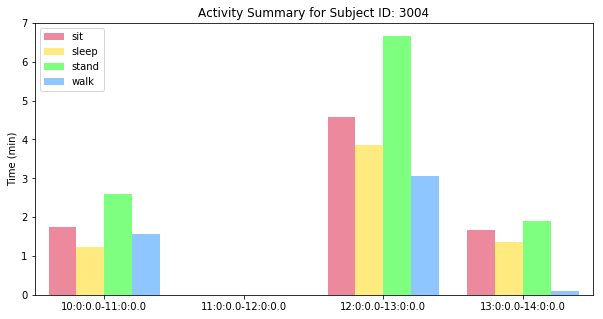

In [100]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[label_list[i]].apply(lambda x: calc_sec('0:' + x)/60),
            width,
            alpha=0.5,
            color=colors[i],
            label=label_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (min)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()